#PART1 => DATA ANALYSIS , EDA , PREPROCESSING AND SAVING

##Importing

In [ ]:
!unzip '/content/drive/MyDrive/aptos2019-blindness-detection.zip'

In [ ]:
import os
os.listdir('/content')

['.config',
 'train_images',
 'test_images',
 'test.csv',
 '.ipynb_checkpoints',
 'train.csv',
 'sample_submission.csv',
 'drive',
 'sample_data']

In [ ]:
import os
os.chdir('/content/drive/My Drive/')
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
import time
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
train_data = pd.read_csv("/content/train.csv")
print("train.csv:")
print("Number of Training images: {}\n".format(train_data.shape[0]))
print(train_data.head(2),"\n")
print("-"*100)
test_data = pd.read_csv("/content/test.csv")
print("test.csv: ")
print("Number of Testing images: {}\n".format(test_data.shape[0]))
print(test_data.head(2))
print("\n","-"*100)
print("sample_submission.csv:")
sample_submission = pd.read_csv("/content/sample_submission.csv")
print("The format of submitting the final predictions on testing images: ")
print(sample_submission.head(5))

train.csv:
Number of Training images: 3662

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4 

----------------------------------------------------------------------------------------------------
test.csv: 
Number of Testing images: 1928

        id_code
0  0005cfc8afb6
1  003f0afdcd15

 ----------------------------------------------------------------------------------------------------
sample_submission.csv:
The format of submitting the final predictions on testing images: 
        id_code  diagnosis
0  0005cfc8afb6          0
1  003f0afdcd15          0
2  006efc72b638          0
3  00836aaacf06          0
4  009245722fa4          0


In [ ]:
img_width = 512
img_height = 512
no_channels = 3
split_size = 0.15
class_labels = {0: 'No DR[0]',1: 'Mild[1]', 2: 'Moderate[2]', 3: 'Severe[3]', 4: 'Proliferative DR[4]'}

##EDA

Number of Images in train dataset:  3662
Number of Images in test dataset:  1928


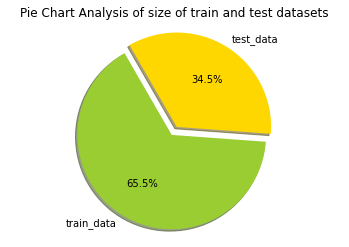

In [ ]:
data = [len(train_data), len(test_data)]
print("Number of Images in train dataset: ", data[0])
print("Number of Images in test dataset: ", data[1])
labels = ['train_data','test_data']
plt.pie(data,explode = [0,0.1], labels= labels, shadow = True, colors = ['yellowgreen','gold'],autopct='%1.1f%%', startangle = 120)
plt.title('Pie Chart Analysis of size of train and test datasets')
plt.axis('equal')
plt.show()


In [ ]:
class_labels_ = list(set(train_data['diagnosis']))
print("Number of target classes: {}".format(class_labels_))

Number of target classes: [0, 1, 2, 3, 4]


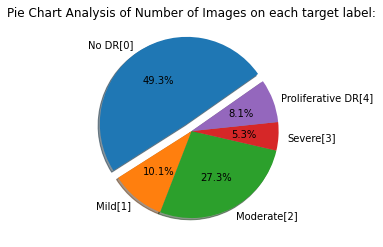

In [ ]:
class_sizes = []
for i in range(0,5):
    class_sizes.append(list(train_data['diagnosis']).count(i))
labels = class_labels.values()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','darkgreen']
plt.pie(class_sizes,explode = [0.1,0,0,0,0], labels= labels, shadow = True,autopct='%1.1f%%', startangle = 35)
plt.title('Pie Chart Analysis of Number of Images on each target label:')
plt.show()

In [ ]:
def image_analysis(dataframe, path):
    width_range = []
    height_range = []
    for i in range(dataframe.shape[0]):
        img = cv2.imread(path+dataframe.iloc[i]['id_code']+'.png')
        height, width, _ = img.shape
        width_range.append(width)
        height_range.append(height)
    return width_range, height_range
width_range, height_range = image_analysis(train_data, '/content/train_images/')

In [ ]:
avg_width = sum(width_range)/len(width_range)
avg_height = sum(height_range)/len(height_range)
max_width = max(width_range)
max_height = max(height_range)
min_width = min(width_range)
min_height = min(height_range)
print("Average width of images in training set: {}".format(int(avg_width)))
print("Average height of images in training set: {}".format(int(avg_height)))
print("-"*100)
print("Maximum width of images in training set: {}".format(max_width))
print("Maximum height of images in training set: {}".format(max_height))
print("-"*100)
print("Minimum width of images in training set: {}".format(min_width))
print("Minimum height of images in training set: {}".format(min_height))

Average width of images in training set: 2015
Average height of images in training set: 1526
----------------------------------------------------------------------------------------------------
Maximum width of images in training set: 4288
Maximum height of images in training set: 2848
----------------------------------------------------------------------------------------------------
Minimum width of images in training set: 474
Minimum height of images in training set: 358


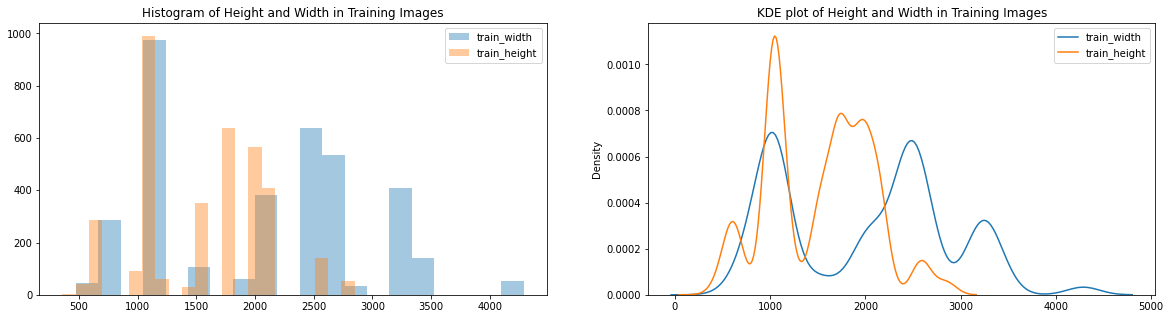

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(width_range, kde = False, label = 'train_width')
sns.distplot(height_range, kde = False, label = 'train_height')
plt.legend()
plt.title("Histogram of Height and Width in Training Images")
plt.subplot(1,2,2)
sns.kdeplot(width_range, label = 'train_width')
sns.kdeplot(height_range, label = 'train_height')
plt.legend()
plt.title('KDE plot of Height and Width in Training Images')
plt.show()

In [ ]:
width_range_test, height_range_test = image_analysis(test_data, '/content/test_images/')
avg_width = sum(width_range_test)/len(width_range_test)
avg_height = sum(height_range_test)/len(height_range_test)
max_width = max(width_range_test)
max_height = max(height_range_test)
min_width = min(width_range_test)
min_height = min(height_range_test)
print("Average width of images in training set: {}".format(int(avg_width)))
print("Average height of images in training set: {}".format(int(avg_height)))
print('-'*100)
print("Maximum width of images in test set: {}".format(max_width))
print("Maximum height of images in test set: {}".format(max_height))
print('-'*100)
print("Minimum width of images in test set: {}".format(min_width))
print("Minimum height of images in test set: {}".format(min_height))

Average width of images in training set: 1043
Average height of images in training set: 783
----------------------------------------------------------------------------------------------------
Maximum width of images in test set: 2896
Maximum height of images in test set: 1958
----------------------------------------------------------------------------------------------------
Minimum width of images in test set: 640
Minimum height of images in test set: 480


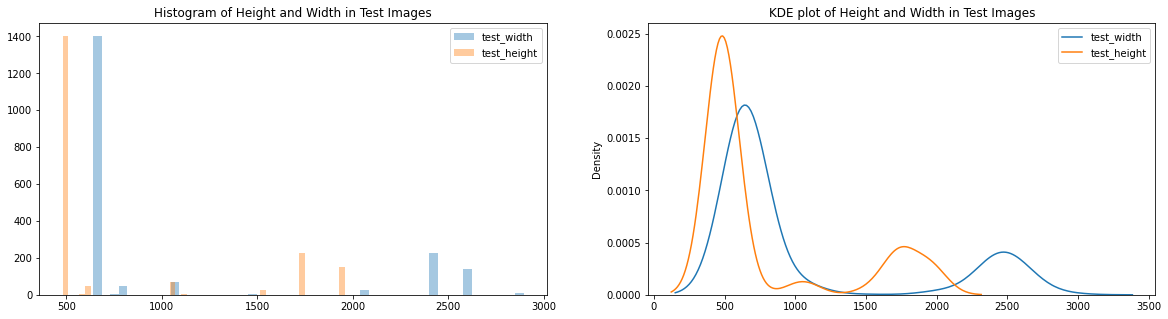

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(width_range_test, kde = False, label = 'test_width')
sns.distplot(height_range_test, kde = False, label = 'test_height')
plt.legend()
plt.title("Histogram of Height and Width in Test Images")
plt.subplot(1,2,2)
sns.kdeplot(width_range_test, label = 'test_width')
sns.kdeplot(height_range_test, label = 'test_height')
plt.legend()
plt.title('KDE plot of Height and Width in Test Images')
plt.show()

##TrainTest split

In [ ]:
def splitting_data(train_data, size, is_split = True):
    """
       This function splits the given data into train and validation sets basing on size for validation.
       Args : df - (dataframe) through which splitting is performed
            size - (Integer) test_size -> percentage of data for validation set
            is_split = (boolean) returns train and validation if it is True , otherwise it simply returns the train data
       Outputs : (Series Object) train and validation sets of data

    """
    try:
        if is_split:
            data = train_data['id_code']
            labels = train_data['diagnosis']
            train_x, validation_x, train_labels, validation_labels = train_test_split(data, labels, stratify=labels, shuffle=True, test_size=size)
            print("Training data: {} {}".format(train_x.shape, train_labels.shape))
            print("Validation data: {} {}".format(validation_x.shape,validation_labels.shape))
            return train_x, train_labels, validation_x, validation_labels
        else:
            return train_data['id_code'], train_data['diagnosis'], [], []
    except:
        print("Error: Invalid file format, Function argument requires .csv file!!!")

In [ ]:
train_x, train_labels, validation_x, validation_labels = train_test_split(test_data, train_data['diagnosis'], stratify=labels, shuffle=True, test_size=0.0)


Training data: (3112,) (3112,)
Validation data: (550,) (550,)


In [ ]:
train = pd.DataFrame(train_x, columns = ['id_code'])
train['diagnosis'] = train_labels
train.to_csv("/content/drive/My Drive/training.csv", index = False)
validation = pd.DataFrame(validation_x, columns = ['id_code'])
validation['diagnosis'] = validation_labels
validation.to_csv('/content/drive/My Drive/validation.csv', index = False)

In [ ]:
test = pd.read_csv('/content/test.csv')
test.to_csv('/content/drive/My Drive/test.csv', index = False)

In [ ]:
train = pd.read_csv("/content/drive/My Drive/training.csv")
validation = pd.read_csv("/content/drive/My Drive/validation.csv")
train_x = train['id_code']
train_labels = train['diagnosis']
validation_x = validation['id_code']
validation_labels = validation['diagnosis']

In [ ]:
def class_analysis(labels, d_set):
    """
    This function plots the histogram of class labels for given set of labels.
    Args : labels - (Series object) which contains the class_labels of train or validation sets.
           d_set - (String) which helps to known whether it is a train or validation set.
    Output : None - this function doesn't return anything
    """
    if d_set == 'training': print("-"*100,'\n')
    counter = labels.value_counts().sort_index()
    counter.plot(kind = 'bar')
    plt.title('Number of images for each Class label in {} set'.format(d_set))
    plt.xlabel('Classes')
    plt.ylabel('Number of images')
    plt.grid()
    plt.show()
    iter=0

    for i in list(set(labels)):
        percentage = list(labels).count(i)/len(list(labels))
        print("Number of images in class - {} ({}) , nearly {} % of total data".format(i,class_labels[i],np.round(percentage*100,4)))
        iter+=1
    if d_set == 'training':
        print("\n","="*100,"\n")
    if d_set == 'validation': print("-"*100,'\n')

---------------------------------------------------------------------------------------------------- 



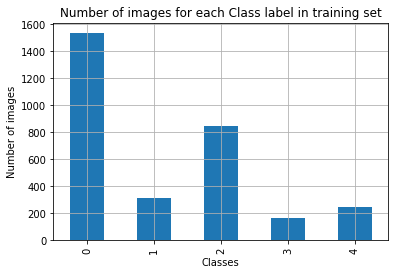

Number of images in class - 0 (No DR[0]) , nearly 49.2931 % of total data
Number of images in class - 1 (Mild[1]) , nearly 10.09 % of total data
Number of images in class - 2 (Moderate[2]) , nearly 27.2815 % of total data
Number of images in class - 3 (Severe[3]) , nearly 5.2699 % of total data
Number of images in class - 4 (Proliferative DR[4]) , nearly 8.0656 % of total data




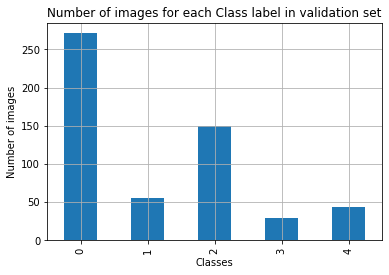

Number of images in class - 0 (No DR[0]) , nearly 49.2727 % of total data
Number of images in class - 1 (Mild[1]) , nearly 10.1818 % of total data
Number of images in class - 2 (Moderate[2]) , nearly 27.2727 % of total data
Number of images in class - 3 (Severe[3]) , nearly 5.2727 % of total data
Number of images in class - 4 (Proliferative DR[4]) , nearly 8.0 % of total data
---------------------------------------------------------------------------------------------------- 



In [ ]:
class_analysis(train_labels,'training')
class_analysis(validation_labels,'validation')

##Image Preprocessing
Reference: https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy





In [ ]:
class ImageProcessing:
    def __init__(self, img_height, img_width, no_channels, tol=7, sigmaX=8):

        ''' Initialzation of variables'''

        self.img_height = img_height
        self.img_width = img_width
        self.no_channels = no_channels
        self.tol = tol
        self.sigmaX = sigmaX

    def cropping_2D(self, img, is_cropping = False):

        '''This function is used for Cropping the extra dark part of the GRAY images'''

        mask = img>self.tol
        return img[np.ix_(mask.any(1),mask.any(0))]

    def cropping_3D(self, img, is_cropping = False):

        '''This function is used for Cropping the extra dark part of the RGB images'''

        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>self.tol

        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # if image is too dark we return the image
            return img
        else:
            img1 = img[:,:,0][np.ix_(mask.any(1),mask.any(0))]  #for channel_1 (R)
            img2 = img[:,:,1][np.ix_(mask.any(1),mask.any(0))]  #for channel_2 (G)
            img3 = img[:,:,2][np.ix_(mask.any(1),mask.any(0))]  #for channel_3 (B)
            img = np.stack([img1,img2,img3],axis=-1)
        return img

    def Gaussian_blur(self, img, is_gaussianblur = False):

        '''This function is used for adding Gaussian blur (image smoothing technique) which helps in reducing noise in the image.'''

        img = cv2.addWeighted(img,4,cv2.GaussianBlur(img,(0,0),self.sigmaX),-4,128)
        return img

    def draw_circle(self,img, is_drawcircle = True):

        '''This function is used for drawing a circle from the center of the image.'''

        x = int(self.img_width/2)
        y = int(self.img_height/2)
        r = np.amin((x,y))     # finding radius to draw a circle from the center of the image
        circle_img = np.zeros((img_height, img_width), np.uint8)
        cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
        img = cv2.bitwise_and(img, img, mask=circle_img)
        return img

    def image_preprocessing(self, img, is_cropping = True, is_gaussianblur = True):

        """
        This function takes an image -> crops the extra dark part, resizes, draw a circle on it, and finally adds a gaussian blur to the images
        Args : image - (numpy.ndarray) an image which we need to process
           cropping - (boolean) whether to perform cropping of extra part(True by Default) or not(False)
           gaussian_blur - (boolean) whether to apply gaussian blur to an image(True by Default) or not(False)
        Output : (numpy.ndarray) preprocessed image
        """

        if img.ndim == 2:
            img = self.cropping_2D(img, is_cropping)  #calling cropping_2D for a GRAY image
        else:
            img = self.cropping_3D(img, is_cropping)  #calling cropping_3D for a RGB image
        img = cv2.resize(img, (self.img_height, self.img_width))  # resizing the image with specified values
        img = self.draw_circle(img)  #calling draw_circle
        img = self.Gaussian_blur(img, is_gaussianblur) #calling Gaussian_blur
        return img

In [ ]:
def images_per_class(class_labels,num, data_x , is_preprocess = False):

    """
    This function plots "num" number of images per each class
    Args : class_labels - (Series Object) which contains the class_labels of train or validation sets.
           num - (Integer) sample number of images to be plot per each class
           data_x - (Series Object) which contains the id_code of each point in train or validation sets.
           is_preprocess - (boolean) whether to perform image processing(True) on image or not(False by Default)
    Output : None - this function doesn't return anything.
    """

    # class_labels num data_x data_y
    labels = list(set(class_labels))
    classes = ['No DR','Mild','Moderate','Severe','Proliferative DR']
    iter=0
    for i in labels:
        j=1
        plt.figure(figsize=(20,5))
        for row in range(len(data_x)):
            if class_labels.iloc[row] == i:
                if is_preprocess == False:plt.subplot(1,num,j)
                else: plt.subplot(1,num*2,j)
                img = cv2.imread('/content/train_images/'+data_x.iloc[row]+'.png')
                img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                plt.imshow(img1)
                plt.axis('off')
                plt.title("Class = {} ({})".format(class_labels.iloc[row],classes[iter]))
                j+=1
                if is_preprocess == True:
                    obj = ImageProcessing(img_width,img_height,no_channels,sigmaX=14)
                    image = obj.image_preprocessing(img)
                    plt.subplot(1,num*2,j)
                    plt.imshow(image)
                    plt.axis('off')
                    plt.title('==> After Image Processing')
                    j+=1
            if is_preprocess == False and j>num: break
            elif is_preprocess == True and j>num*2: break
        iter+=1
        plt.show()

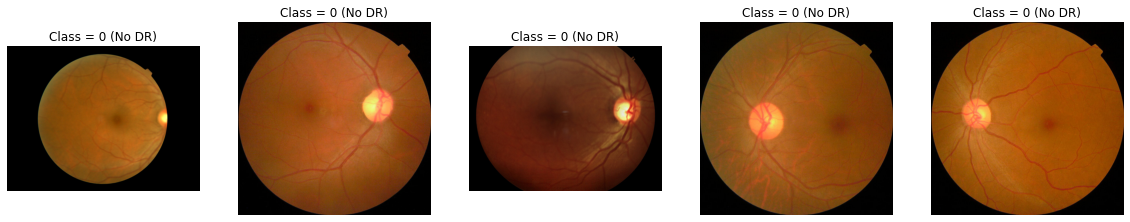

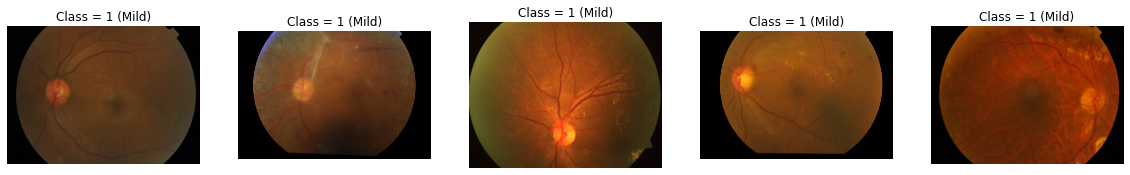

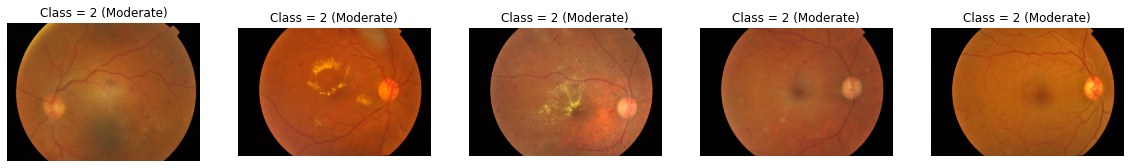

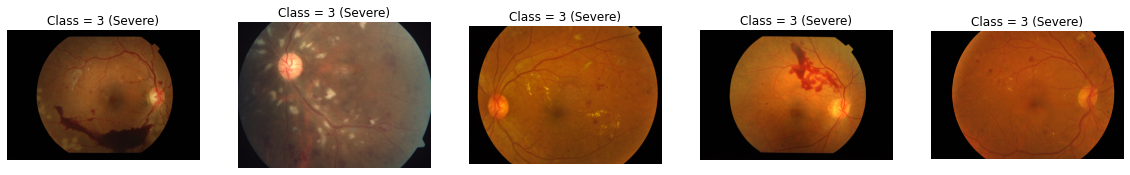

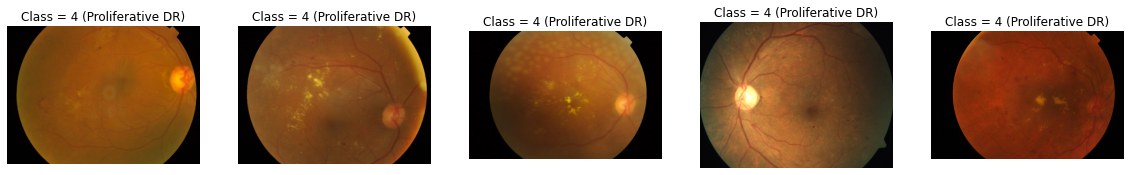

In [ ]:
images_per_class(train_labels,5,train_x,False)  #printing 5 random images per each class.


In [ ]:
def plotting(img, title,i):
    """
    This function is used for subplots
    Args: img (numpy.ndarray) - image we need to plot
          title(string) - title of the plot
          i (integer) -  column number
    output: None - this function doesn't return anything.
    """
    plt.subplot(1,5,i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)

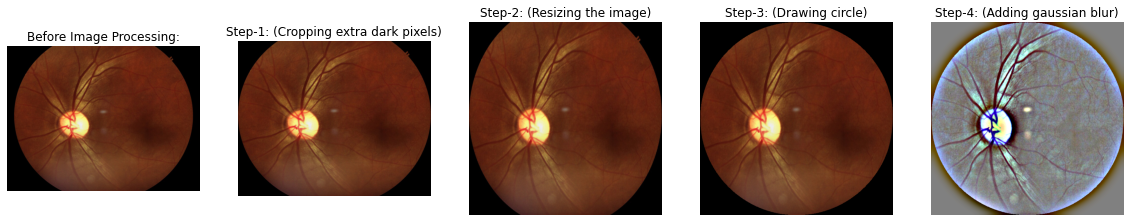

In [ ]:
obj1 = ImageProcessing(img_width,img_height, no_channels, sigmaX = 14)
img = '/content/train_images/201f882365d3.png'  #random train image
img = cv2.imread(img)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,5))
plotting(img1,'Before Image Processing:',1)
img1 = obj1.cropping_3D(img1)
plotting(img1,'Step-1: (Cropping extra dark pixels)',2)
img1 = cv2.resize(img1, (img_height,img_width))
plotting(img1,'Step-2: (Resizing the image)',3)
img1 = obj1.draw_circle(img1)
plotting(img1,'Step-3: (Drawing circle)',4)
img = obj1.image_preprocessing(img,'True')
plotting(img,'Step-4: (Adding gaussian blur)',5)

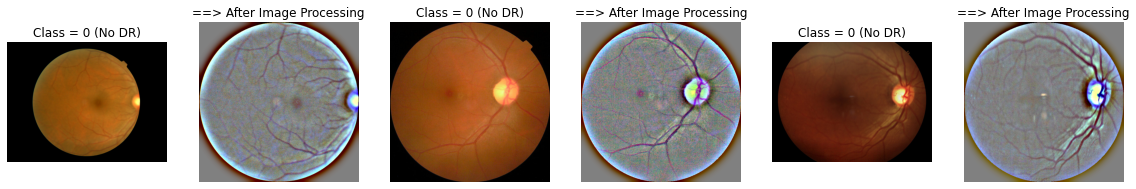

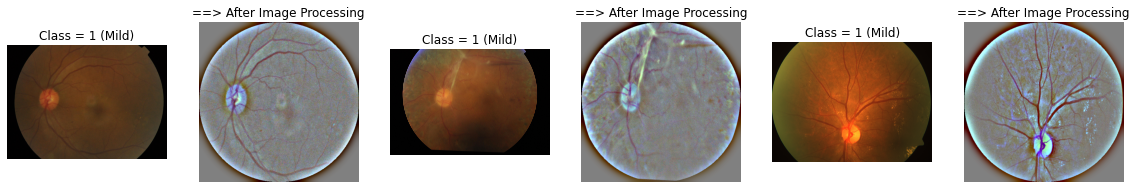

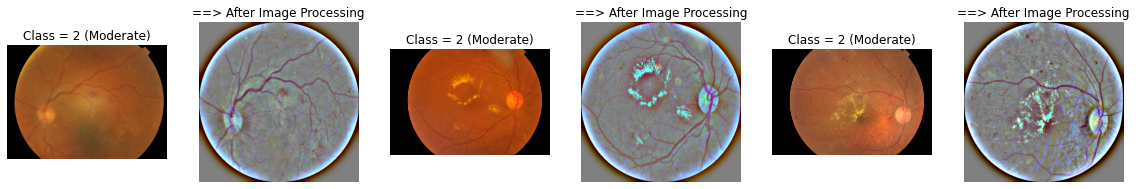

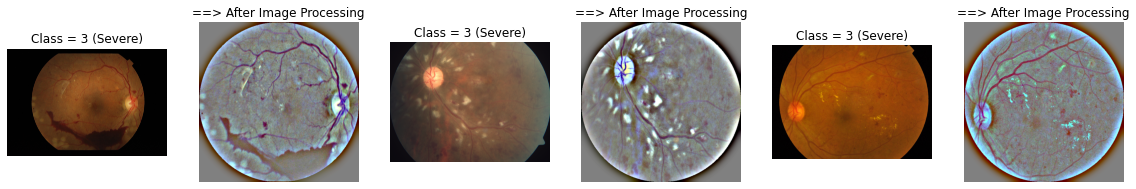

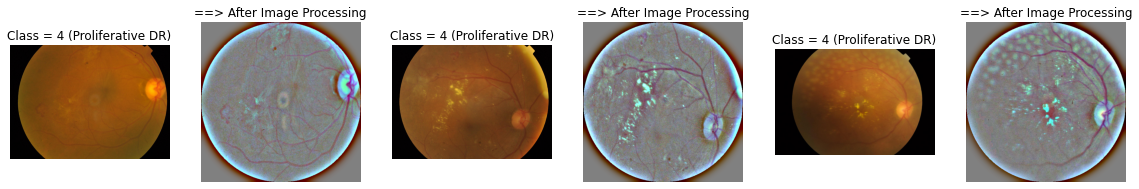

In [ ]:
images_per_class(train_labels,3,train_x,True)

In [ ]:
def image_2_vector(data, sep):
    """
    This function is used for Converting an images into a vector and storing it in a file (.npy) format.
    Input: data (Series Object) - which contains the path of the images
           sep (String)   - used in file creation
    Output: None - This function doesn't return anything.
    """
    start_time = time.time()  # storing timestamp
    image_vector = np.empty((len(data),img_width, img_height, no_channels), dtype = np.uint8)
    image_processing = ImageProcessing(img_width, img_height, no_channels, sigmaX)  # Object creation
    if sep !='test':
        c = '/content/train_images/'
    else:
        c = '/content/test_images/'
    for iter,row in enumerate(tqdm(data)):
        img_path = c+data.iloc[iter]+'.png'
        img = cv2.imread(img_path)
        img = image_processing.image_preprocessing(img)    #calling image_preprocessing
        image_vector[iter,:,:,:] = img

    if sep == 'training': print("\nShape of the vector:",image_vector.shape)
    else: print("\n\nShape of the vector:",image_vector.shape)
    print("Time taken to process the {} images: {} seconds".format(sep,np.round(time.time()-start_time,5)))
    path = '/content/drive/My Drive/processed_images'
    print("... Saving image_vector to {}".format(path+'/'+sep))

    if sep == 'training':
        print("\n","-"*100,"\n")
    if not os.path.exists(path):
        os.makedirs(path)
    np.save(path+'/'+sep+'.npy', image_vector)  #saving file

In [ ]:
sigmaX = 14
image_2_vector(train_x, "training") # function calling
image_2_vector(validation_x,"validation")  #function calling

100%|██████████| 3112/3112 [10:58<00:00,  4.73it/s]



Shape of the vector: (3112, 512, 512, 3)
Time taken to process the training images: 658.13536 seconds
... Saving image_vector to /content/drive/My Drive/processed_images/training

 ---------------------------------------------------------------------------------------------------- 



100%|██████████| 550/550 [02:11<00:00,  4.19it/s]




Shape of the vector: (550, 512, 512, 3)
Time taken to process the validation images: 131.17289 seconds
... Saving image_vector to /content/drive/My Drive/processed_images/validation


In [ ]:
train_x = np.load('/content/drive/My Drive/processed_images/training.npy')  #training set
validation_x = np.load('/content/drive/My Drive/processed_images/validation.npy')  #validation set
#test_x = np.load('/content/drive/My Drive/processed_images/test.npy')    #test

'plt.subplot(133)\nplt.imshow(test_x[1200])        #random test example\nplt.title("Testing sample image")\nplt.axis(\'off\')\nplt.show()'

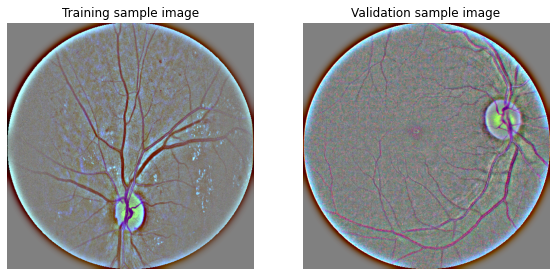

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(train_x[8])   #random training example
plt.axis('off')
plt.title("Training sample image")
plt.subplot(132)
plt.imshow(validation_x[120])    #random validation example
plt.title("Validation sample image")
plt.axis('off')
"""
plt.subplot(133)
plt.imshow(test_x[1200])        #random test example
plt.title("Testing sample image")
plt.axis('off')
plt.show()
"""

#PART2 => DEEPLEARNING MODEL BUILDING AND ANALYSIS

##Target Labelling and metric defining

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
os.chdir('/content/drive/MyDrive/Work_Yashwardhan/')
from sklearn.utils import class_weight
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import keras
from keras import backend as K
import tensorflow as tf
from keras.callbacks import Callback
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import ResNet50, ResNet152
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dropout, Dense, Conv2D, MaxPooling2D, Activation, Flatten
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
try:
    x_train = np.load("processed_images/training.npy", mmap_mode=None, allow_pickle=False, fix_imports=True)
    x_validation = np.load("processed_images/validation.npy",mmap_mode=None, allow_pickle=False, fix_imports=True)
    #x_test = np.load("processed_images/test.npy", mmap_mode = None,allow_pickle = False, fix_imports = True)
    print("Loaded Successfully...\n")
    print(x_train.shape)
    print(x_validation.shape)
    #print(x_test.shape)
except:
    print("file not exists")

Loaded Successfully...

(3112, 512, 512, 3)
(550, 512, 512, 3)


In [ ]:
train_labels = pd.read_csv('processed_images/training.csv')
train_labels = train_labels['diagnosis']
validation_labels = pd.read_csv('processed_images/validation.csv')
validation_labels = validation_labels['diagnosis']
print("Training:",train_labels.shape[0])
print("Validation:",validation_labels.shape[0])

Training: 3112
Validation: 550


In [ ]:
def ordinal_encoding(labels):
    """
    This function is used to create one_hot_encoding of the labels.
    E.x: category = 3 -> one-hot-encoding [1,1,1,1,0].
         category = 2 -> one-hot-encoding [1,1,1,0,0].
    """
    y_train = pd.get_dummies(labels).values
    y_train_multi = np.empty(y_train.shape, dtype=y_train.dtype)
    y_train_multi[:, 4] = y_train[:, 4]

    for i in range(3, -1, -1):
         y_train_multi[:, i] = np.logical_or(y_train[:, i], y_train_multi[:, i+1])
    return y_train_multi
labels_train = ordinal_encoding(train_labels)
labels_validation = ordinal_encoding(validation_labels)
print(labels_train.shape)
print(labels_validation.shape)
print("Ex: Original Category: {}\n After one_hot_encoding: {}".format(train_labels.iloc[23],labels_train[23]))

(3112, 5)
(550, 5)
Ex: Original Category: 3
 After one_hot_encoding: [1 1 1 1 0]


In [ ]:
class_weights = class_weight.compute_class_weight('balanced',classes=[0,1,2,3,4],y=train_labels)
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

{0: 0.4057366362451108, 1: 1.9821656050955414, 2: 0.7330977620730271, 3: 3.795121951219512, 4: 2.4796812749003982}


###Evaluation Metric Used :  Kappa

In [ ]:
def kappa_metric(y_true, y_pred):
    """
    This function is used for calculating kappa score between the model predicted values and true values
    Args: y_true (np.ndarray or list) - true values
          y_pred (np.ndarray or list) - model predicted value
    Output: _kappa_ (integer or float) - return's kappa score
    """
    y_true = y_true.sum(axis=1) - 1
    y_pred = y_pred > 0.5
    y_pred = y_pred.astype(int).sum(axis=1) - 1
    _kappa_ = cohen_kappa_score( y_true, y_pred,  weights='quadratic' )
    return _kappa_

In [ ]:
class Metrics(Callback):
    def __init__(self, path,validation_data):
        ''' Initialization of variables '''
        super(Callback, self).__init__()
        self.path = path
        self.validation_data=validation_data
    def ModelCheckPoint(self, path):
        ''' This function is used for Storing the model weights if val_kappa improves from all the previous epochs'''
        self.model.save(path)
    def on_train_begin(self, logs={}):
        self.val_kappas = []
    def on_epoch_end(self, epoch, logs={}):
        ''' This function is used for calculating kappa score on each epoch and updates the validation kappa score if it improves from the previous epochs'''
        X_val, y_val = self.validation_data[:2]
        y_val = y_val.sum(axis=1) - 1
        y_pred = self.model.predict(X_val) > 0.5
        y_pred = y_pred.astype(int).sum(axis=1) - 1
        _val_kappa = cohen_kappa_score(
            y_val,
            y_pred,
            weights='quadratic'
        )
        self.val_kappas.append(_val_kappa)
        print(f"\b - val_kappa:  {_val_kappa:.4f}")
        if _val_kappa == max(self.val_kappas):
            print("\n\t\tValidation Kappa has improved. Saving model to {}...".format(self.path))
            self.ModelCheckPoint(self.path)
        else:
            print("\n\t\tValidation kappa did not improved from {}".format(max(self.val_kappas)))
        return

In [ ]:
class PerformanceMetric:
    def __init__(self,actual_labels,predicted_labels):
        ''' Initialization of variables '''
        self.actual_labels = actual_labels
        self.predicted_labels = predicted_labels
    def single_value_conversion(self):
        ''' This function is used for Converting model predicted values into single values
           Ex: model_predicted_value: [0,1,0,0,0] and it converts as 1'''
        predicted_labels = self.predicted_labels > 0.5
        prediction_ordinal = np.empty(predicted_labels.shape, dtype = int)
        prediction_ordinal[:,4] = predicted_labels[:,4]
        for i in range(3, -1, -1): prediction_ordinal[:, i] = np.logical_or(predicted_labels[:,i], prediction_ordinal[:,i+1])
        self.predicted_labels = prediction_ordinal.sum(axis = 1)-1
        self.actual_labels = self.actual_labels.sum(axis = 1)-1
    def confusionMatrix(self):
        ''' This function is used for calculating confusion matrix between model predicted values and true values using sklearn implementation.'''
        confusion_matrix_ = confusion_matrix(self.actual_labels, self.predicted_labels)
        return confusion_matrix_
    def precision(self, matrix):
        ''' This function is used for calculating precision matrix between predicted values and true values using confusion matrix'''
        precision_matrix =(((matrix.T)/(matrix.sum(axis=1))).T)
        return precision_matrix
    def recall(self, matrix):
        ''' this function is used for calculating recall matrix between predicted values and true values using confusion matrix'''
        recall_matrix =(matrix/matrix.sum(axis=0))
        return recall_matrix
    def subplot_(self, matrix, i, title):
        ''' This function is used for subplots'''
        plt.subplot(1,3,i)
        labels = [1,2,3,4,5]
        sns.heatmap(matrix, annot=True, cmap=sns.light_palette('green'),linewidths = 0.8,cbar = False, fmt=".3f", xticklabels=labels, yticklabels=labels)
        plt.title(title)
        plt.xlabel('Predicted Class Labels')
        plt.ylabel('Actual Class Labels')
    def plotting(self):
        """
        This function is used for calculating number of misclassified points, confusion, recall and precision matrixes and plotting it using subplots.
        """
        self.single_value_conversion()
        confusion_matrix = self.confusionMatrix()
        #print("Number of misclassified points: ",(len(self.actual_labels)-np.trace(confusion_matrix))/len(self.actual_labels)*100,"\n")
        precision_matrix = self.precision(confusion_matrix)
        recall_matrix = self.recall(confusion_matrix)
        plt.figure(figsize=(20,5))
        self.subplot_(confusion_matrix, 1, 'Confusion Matrix')
        self.subplot_(precision_matrix, 2, 'Precision')
        self.subplot_(recall_matrix, 3, 'Recall')
        plt.show()

In [ ]:
def plotting(iter, val_kappa):
    """
    This function is used for plotting validation_kappa on each epoch
    Args: iter(integer) - Number of epochs we runned on model training.
          val_kappa(list) - validation kappa score on each epoch
    Output: None - It doesn't return anything.
    """
    epoch = [i for i in range(iter)]
    plt.plot(epoch,val_kappa)
    plt.title('validation_kappa on each epoch')
    plt.xlabel('epoch')
    plt.ylabel('val_kappa')
    plt.grid()
    plt.show()

In [ ]:
def test_prediction(predicted_labels):
    '''
    Making predictions of the probability scores. The class with more score will be taken as predicted class.
    Arguments:
    predicted_labels - (np.array) - probability score of given sample
    '''
    predicted_labels = predicted_labels > 0.5
    prediction_ordinal = np.empty(predicted_labels.shape, dtype = int)
    prediction_ordinal[:,4] = predicted_labels[:,4]
    for i in range(3, -1, -1): prediction_ordinal[:, i] = np.logical_or(predicted_labels[:,i], prediction_ordinal[:,i+1])
    predicted_labels = prediction_ordinal.sum(axis = 1)-1
    return predicted_labels

###Modelling

In [ ]:
import os
diabetic_models_path='/content/drive/MyDrive/Work_Yashwardhan/models/'
tensorboard_path='/content/drive/MyDrive/Work_Yashwardhan/tensorboard/'
if os.path.isdir(diabetic_models_path) is False:
  os.mkdir(diabetic_models_path)
if os.path.isdir(tensorboard_path) is False:
  os.mkdir(tensorboard_path)

####Model1- Baseline

In [ ]:
def baseline_model():
    ''' This function is used for building a base line convolutional neural network architecture '''
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(2, 2), input_shape=[512,512,3], activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=128, activation = 'relu'))
    model.add(Dense(units=256, activation = 'relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(5, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(lr=0.00005), metrics=['accuracy'])
    return model

In [ ]:
baseline = baseline_model()
baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 511, 511, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 64)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
baseline = baseline_model()
validation_data = (x_validation, labels_validation)
kappa_metrics = Metrics(f'{diabetic_models_path}baseline1.h5',validation_data)
tensorboard = TensorBoard(log_dir = f'{tensorboard_path}baseline1')
call_backs = [kappa_metrics,tensorboard]
history = baseline.fit(x_train, labels_train, epochs = 30, batch_size = 32, verbose = 2, class_weight = class_weight_dict, validation_data = validation_data, callbacks = call_backs)

Epoch 1/30
18/18 [==============================] - 1s 41ms/step
 - val_kappa:  0.0023

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/baseline1.h5...
98/98 - 24s - loss: 0.2106 - accuracy: 0.9772 - val_loss: 0.4060 - val_accuracy: 1.0000 - 24s/epoch - 246ms/step
Epoch 2/30
18/18 [==============================] - 1s 44ms/step
 - val_kappa:  0.0145

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/baseline1.h5...
98/98 - 14s - loss: 0.1814 - accuracy: 1.0000 - val_loss: 0.4001 - val_accuracy: 1.0000 - 14s/epoch - 140ms/step
Epoch 3/30
18/18 [==============================] - 1s 44ms/step
 - val_kappa:  0.2285

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/baseline1.h5...
98/98 - 14s - loss: 0.1698 - accuracy: 1.0000 - val_loss: 0.3915 - val_accuracy: 1.0000 - 14s/epoch - 142ms/step
Epoch 4/30
18/18 [==============================] - 1s 43m

In [ ]:
baseline = baseline_model()
baseline.load_weights("/content/drive/MyDrive/Work_Yashwardhan/models/baseline1.h5")
result1 = baseline.evaluate(x_validation,labels_validation)
y_pred = baseline.predict(x_validation)
print("After running the model for 30 epochs we got loss = {} Accuracy = {} kappa_score = {} on validation data".format(np.round(result1[0],4),np.round(result1[1],4),np.round(kappa_metric(labels_validation,y_pred),4)))


18/18 [==============================] - 1s 43ms/step
After running the model for 30 epochs we got loss = 0.2379 Accuracy = 1.0 kappa_score = 0.6725 on validation data


In [ ]:
ytrain_baseline = baseline.predict(x_train)
ytrain_baseline = test_prediction(ytrain_baseline)
print("First five data points predictions in training:",ytrain_baseline[:5])
print("length of traindata prediction:",ytrain_baseline.shape,"\n")

yvalidation_baseline = baseline.predict(x_validation)
yvalidation_baseline = test_prediction(yvalidation_baseline)
print("First five data points predictions in validation:",yvalidation_baseline[:5])
print("length of validation data prediction:",yvalidation_baseline.shape,"\n")

"""ytest_baseline = baseline.predict(x_test)
ytest_baseline = test_prediction(ytest_baseline)
print("First five data points predictions in test:",ytest_baseline[:5])
print("length of test data prediction:",ytest_baseline.shape)"""

98/98 [==============================] - 4s 45ms/step
First five data points predictions in training: [2 2 0 2 2]
length of traindata prediction: (3112,) 

18/18 [==============================] - 1s 44ms/step
First five data points predictions in validation: [0 2 2 0 0]
length of validation data prediction: (550,) 



'ytest_baseline = baseline.predict(x_test)\nytest_baseline = test_prediction(ytest_baseline)\nprint("First five data points predictions in test:",ytest_baseline[:5])\nprint("length of test data prediction:",ytest_baseline.shape)'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


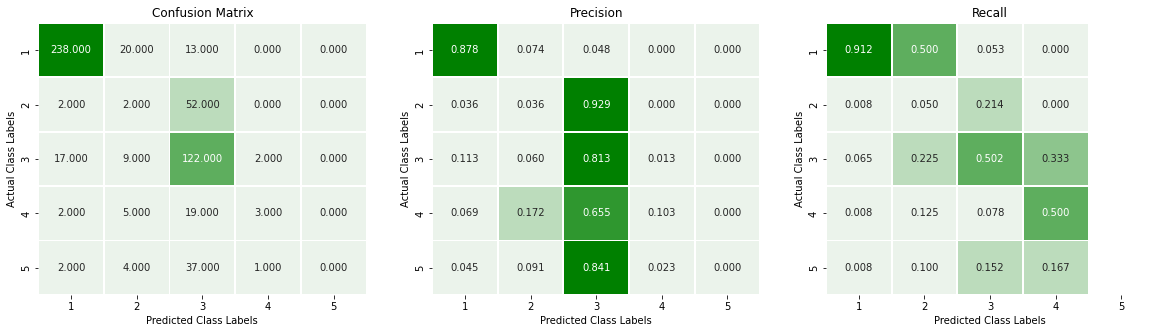

In [ ]:
metric = PerformanceMetric(labels_validation, y_pred)
metric.plotting()

In [ ]:
!pip install tensorboard --quiet

In [ ]:
"""import tensorboard
%load_ext tensorboard
%tensorboard --logdir=f"{tensorboard_path}baseline1" """

In [ ]:
x="baseline "
!tensorboard dev upload --logdir r'/content/drive/MyDrive/Work_Yashwardhan/tensorboard/{}' \
  --name x \
  --description "Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/WcOCZwJ6RhWeCvANVAPjRA/

[2022-11-11T16:40:29] Started scanning logdir.
[2022-11-11T16:40:32] Total uploaded: 382 scalars, 0 tensors, 0 binary objects
[2022-11-11T16:40:32] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/WcOCZwJ6RhWeCvANVAPjRA/


###MODEL2 - Other models to try : alexnet , vgg16,19,densenet,resnet50,resnet152,inceptionv3,efficientnet,xceptionet, ENSEMBLE MODEL

alexnet

In [ ]:
def AlexNet():
    ''' This function is used for building an alexnet architecture '''
    model = Sequential(name='alexnet')
    model.add(Conv2D(96,(11,11),strides = (4,4), padding = 'valid', activation = 'relu', kernel_initializer = 'he_normal',input_shape = (512,512,3)))
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))
    model.add(Conv2D(256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))
    model.add(Conv2D(384, kernel_size = (3,3), padding = 'same', activation= 'relu'))
    model.add(Conv2D(384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))
    model.add(Flatten())
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2048, activation = 'relu'))
    model.add(Dense(5, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])
    return model
alex_net=AlexNet()

In [ ]:
validation_data = (x_validation, labels_validation)
kappa_metrics = Metrics(f'{diabetic_models_path}alexnet.h5',validation_data)
tensorboard = TensorBoard(log_dir = f'{tensorboard_path}alexnet')
call_backs = [kappa_metrics, tensorboard]
#history = baseline.fit(x_train, labels_train, epochs = 30, batch_size = 32, verbose = 2, class_weight = class_weight_dict, validation_data = validation_data, callbacks = call_backs)
history = alex_net.fit(x_train, labels_train, epochs = 30, batch_size = 8, verbose = 2, validation_data = (x_validation, labels_validation), callbacks = call_backs)

Epoch 1/30
18/18 [==============================] - 2s 58ms/step
 - val_kappa:  0.6082

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/alexnet.h5...
389/389 - 62s - loss: 2.2504 - accuracy: 0.9643 - val_loss: 0.3042 - val_accuracy: 1.0000 - 62s/epoch - 160ms/step
Epoch 2/30
18/18 [==============================] - 1s 60ms/step
 - val_kappa:  0.6253

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/alexnet.h5...
389/389 - 54s - loss: 0.3671 - accuracy: 0.9881 - val_loss: 0.2603 - val_accuracy: 1.0000 - 54s/epoch - 140ms/step
Epoch 3/30
18/18 [==============================] - 1s 60ms/step
 - val_kappa:  0.7012

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/alexnet.h5...
389/389 - 54s - loss: 0.3023 - accuracy: 0.9926 - val_loss: 0.2372 - val_accuracy: 1.0000 - 54s/epoch - 140ms/step
Epoch 4/30
18/18 [==============================] - 1s 60m

In [ ]:
alexnet = AlexNet()
alexnet.load_weights("/content/drive/MyDrive/Work_Yashwardhan/models/alexnet.h5")
result1 = alexnet.evaluate(x_validation,labels_validation)
y_pred = alexnet.predict(x_validation)
print("After running the model for 30 epochs we got loss = {} Accuracy = {} kappa_score = {} on validation data".format(np.round(result1[0],4),np.round(result1[1],4),np.round(kappa_metric(labels_validation,y_pred),4)))


18/18 [==============================] - 1s 59ms/step
After running the model for 30 epochs we got loss = 0.2081 Accuracy = 0.7527 kappa_score = 0.7827 on validation data


In [ ]:
ytrain_baseline = alexnet.predict(x_train)
ytrain_baseline = test_prediction(ytrain_baseline)
print("First five data points predictions in training:",ytrain_baseline[:5])
print("length of traindata prediction:",ytrain_baseline.shape,"\n")

yvalidation_baseline = alexnet.predict(x_validation)
yvalidation_baseline = test_prediction(yvalidation_baseline)
print("First five data points predictions in validation:",yvalidation_baseline[:5])
print("length of validation data prediction:",yvalidation_baseline.shape,"\n")

"""ytest_baseline = baseline.predict(x_test)
ytest_baseline = test_prediction(ytest_baseline)
print("First five data points predictions in test:",ytest_baseline[:5])
print("length of test data prediction:",ytest_baseline.shape)"""

98/98 [==============================] - 6s 61ms/step
First five data points predictions in training: [3 3 0 2 2]
length of traindata prediction: (3112,) 

18/18 [==============================] - 1s 60ms/step
First five data points predictions in validation: [0 2 2 0 0]
length of validation data prediction: (550,) 



'ytest_baseline = baseline.predict(x_test)\nytest_baseline = test_prediction(ytest_baseline)\nprint("First five data points predictions in test:",ytest_baseline[:5])\nprint("length of test data prediction:",ytest_baseline.shape)'

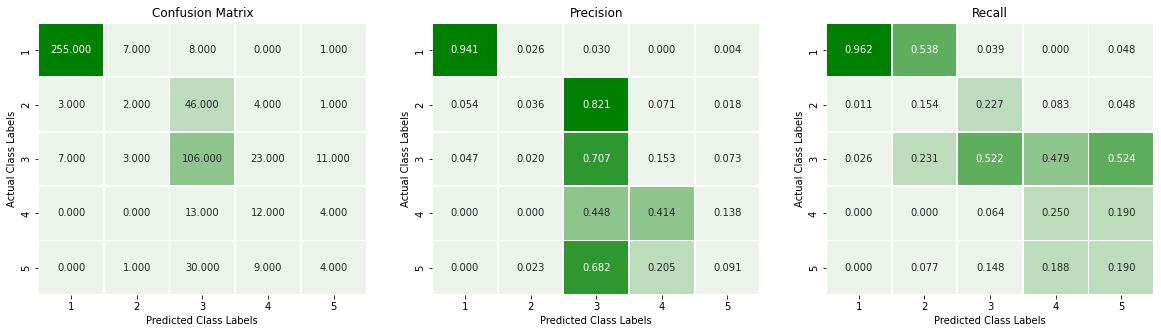

In [ ]:
metric = PerformanceMetric(labels_validation, y_pred)
metric.plotting()

In [ ]:
!tensorboard dev upload --logdir '/content/drive/MyDrive/Work_Yashwardhan/tensorboard/alexnet' \
  --name "alexnet " \
  --description "Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/BAR5HAWjRvWdO61y6oQqvA/

[2022-11-11T17:48:27] Started scanning logdir.
[2022-11-11T17:48:27] Total uploaded: 180 scalars, 0 tensors, 0 binary objects
[2022-11-11T17:48:27] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/BAR5HAWjRvWdO61y6oQqvA/


DATA AUGMENTATION

1.horizontal flipping
2.Vertical flipping
3.rotation_range
4.zoom range

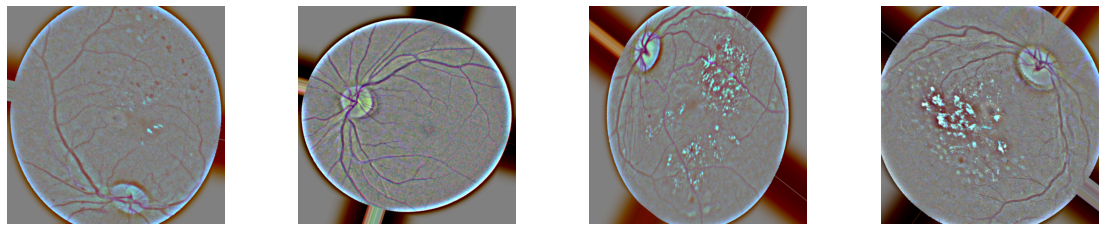

In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=180,zoom_range = 0.2)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
it = 0
for x, y in data_generator.flow(x_train,train_labels):
    ax[it].imshow((x[0]).astype('uint8'))
    ax[it].axis('off')
    it += 1
    if it == 4:
        break

In [ ]:
def GAP2D():
    '''Global average pooling layer'''
    global_average_pooling = GlobalAveragePooling2D()
    return global_average_pooling
def dropout(value = 0.5):
    '''Dropout layer'''
    dropout_layer = Dropout(value)
    return dropout_layer
def dense():
    '''Dense layer'''
    dense_layer = Dense(5, activation='sigmoid')
    return dense_layer

VGG16

In [ ]:
global_average_pooling_layer = GAP2D()
dropout_layer = dropout()
dense_layer = dense()

In [ ]:
def VGG16_(top_6 = False):
    '''This function is used for building a model architecture of pretrained vgg16 on imagenet data set.'''
    vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = (512,512,3))
    if not top_6:
        for layer in vgg.layers:
            layer.trainable = False
    else:
         for layer in vgg.layers[:13]:
            layer.trainable=False
    x = global_average_pooling_layer(vgg.layers[-1].output)
    x = dropout_layer(x)
    output = dense_layer(x)
    model = Model(vgg.layers[0].input,output)
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.00005), metrics=['accuracy'])
    return model

In [ ]:
from tensorflow.keras.models import Model
vgg16 = VGG16_(True)
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tensorboard = TensorBoard(log_dir = f'{tensorboard_path}vgg16')
validation_data = (x_validation, labels_validation)
kappa_metrics = Metrics(f'{diabetic_models_path}vgg16.h5',validation_data)
data_generator = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=180,zoom_range = 0.2)
call_backs = [kappa_metrics, tensorboard]
vgg16 = VGG16_(top_6 = True)
history = vgg16.fit_generator(
                   data_generator.flow(x_train, labels_train, batch_size=12),
                    steps_per_epoch=len(x_train) / 12,
                    epochs=30,
                    initial_epoch=0,
                    verbose=1,
                    validation_data=(x_validation, labels_validation),
                    validation_steps=len(x_validation) / 12,
                    callbacks=[kappa_metrics,tensorboard])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/30
18/18 [==============================] - 28s 858ms/step
 - val_kappa:  0.7969

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/vgg16.h5...
259/259 [==============================] - 256s 925ms/step - loss: 0.2895 - accuracy: 0.9020 - val_loss: 0.1877 - val_accuracy: 0.8145
Epoch 2/30
18/18 [==============================] - 13s 733ms/step
 - val_kappa:  0.8366

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/vgg16.h5...
259/259 [==============================] - 224s 864ms/step - loss: 0.1906 - accuracy: 0.8184 - val_loss: 0.1412 - val_accuracy: 0.7855
Epoch 3/30
18/18 [==============================] - 13s 733ms/step
 - val_kappa:  0.8918

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/vgg16.h5...
259/259 [==============================] - 198s 763ms/step - loss: 0.1657 - accuracy: 0.8094 - val_loss: 0.1322 - val_accuracy: 0.712

In [ ]:
vgg16 = VGG16_(top_6 = True)
vgg16.load_weights("/content/drive/MyDrive/Work_Yashwardhan/models/vgg16.h5")
result = vgg16.evaluate(x_validation,labels_validation)
y_pred = vgg16.predict(x_validation)
print("After running the model for 30 epochs we got loss = {} Accuracy = {} kappa_score = {} on validation data".format(np.round(result[0],4),np.round(result[1],4),np.round(kappa_metric(labels_validation,y_pred),4)))


18/18 [==============================] - 12s 673ms/step
After running the model for 30 epochs we got loss = 0.1499 Accuracy = 0.8709 kappa_score = 0.903 on validation data


In [ ]:
ytrain_vgg16 = vgg16.predict(x_train)
ytrain_vgg16 = test_prediction(ytrain_vgg16)
print("First five data points predictions in training:",ytrain_vgg16[:5])
print("length of traindata prediction:",ytrain_vgg16.shape,"\n")

yvalidation_vgg16 = vgg16.predict(x_validation)
yvalidation_vgg16 = test_prediction(yvalidation_vgg16)
print("First five data points predictions in validation:",yvalidation_vgg16[:5])
print("length of validation data prediction:",yvalidation_vgg16.shape,"\n")

98/98 [==============================] - 73s 754ms/step
First five data points predictions in training: [4 1 0 2 2]
length of traindata prediction: (3112,) 

18/18 [==============================] - 12s 729ms/step
First five data points predictions in validation: [0 2 2 0 0]
length of validation data prediction: (550,) 



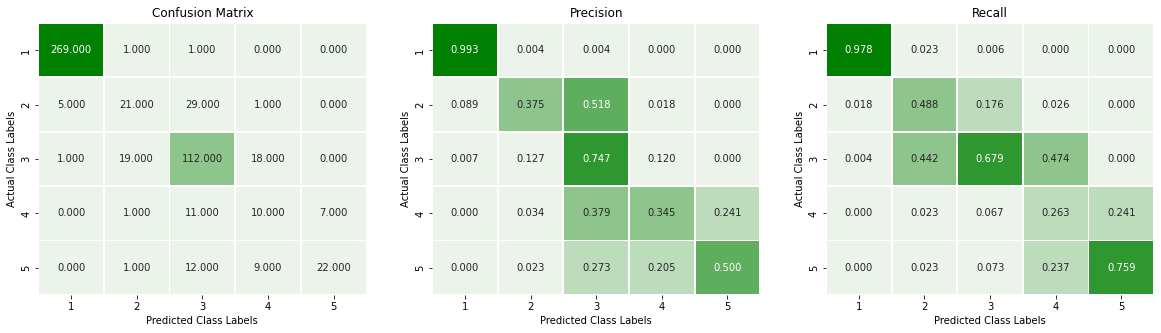

In [ ]:
metric = PerformanceMetric(labels_validation, y_pred)
metric.plotting()

In [ ]:
!tensorboard dev upload --logdir '/content/drive/MyDrive/Work_Yashwardhan/tensorboard/vgg16' \
  --name "vgg16 " \
  --description "Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/i7jjV8erRh2FkDOiGQW73w/

[2022-11-12T10:12:05] Started scanning logdir.
[2022-11-12T10:12:06] Total uploaded: 180 scalars, 0 tensors, 1 binary objects (89.0 kB)
[2022-11-12T10:12:06] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/i7jjV8erRh2FkDOiGQW73w/


vgg 19

In [ ]:
global_average_pooling_layer = GAP2D()
dropout_layer = dropout()
dense_layer = dense()

In [ ]:
def VGG19_(top_6 = False):
    '''This function is used for building a model architecture of pretrained Vgg19 on imagenet data set.'''
    vgg = VGG19(weights = 'imagenet', include_top = False, input_shape = (512,512,3))
    if not top_6:
        for layer in vgg.layers:
            layer.trainable = False
    else:
         for layer in vgg.layers[:13]:
            layer.trainable=False
    x = global_average_pooling_layer(vgg.layers[-1].output)
    x = dropout_layer(x)
    output = dense_layer(x)
    model = Model(vgg.layers[0].input,output)
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.00005), metrics=['accuracy'])
    return model

In [ ]:
vgg19 = VGG19_(top_6 = True)
vgg19.summary()

80134624/80134624 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                              

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tensorboard = TensorBoard(log_dir = f'{tensorboard_path}vgg19')
validation_data = (x_validation, labels_validation)
kappa_metrics = Metrics(f'{diabetic_models_path}vgg19.h5',validation_data)
data_generator = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=180,zoom_range = 0.2)
vgg19 = VGG19_(top_6 = True)
history = vgg19.fit_generator(
                   data_generator.flow(x_train, labels_train, batch_size=8),
                    steps_per_epoch=len(x_train) / 8,
                    epochs=30,
                    initial_epoch=0,
                    verbose=1,
                    validation_data=(x_validation, labels_validation),
                    validation_steps=len(x_validation) / 8,
                    callbacks=[kappa_metrics,tensorboard],
                    class_weight = class_weight_dict)

<ipython-input-19-26f15b48ecd2>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = vgg19.fit_generator(


Epoch 1/30
18/18 [==============================] - 30s 902ms/step
 - val_kappa:  0.7254

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/vgg19.h5...
389/389 [==============================] - 241s 577ms/step - loss: 0.1208 - accuracy: 0.9576 - val_loss: 0.1882 - val_accuracy: 1.0000
Epoch 2/30
18/18 [==============================] - 16s 956ms/step
 - val_kappa:  0.7592

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/vgg19.h5...
389/389 [==============================] - 211s 541ms/step - loss: 0.0778 - accuracy: 0.9361 - val_loss: 0.1705 - val_accuracy: 1.0000
Epoch 3/30
18/18 [==============================] - 16s 955ms/step
 - val_kappa:  0.8043

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/vgg19.h5...
389/389 [==============================] - 211s 541ms/step - loss: 0.0720 - accuracy: 0.9267 - val_loss: 0.1436 - val_accuracy: 1.000

In [ ]:
vgg19 = VGG19_(top_6 = True)
vgg19.load_weights("/content/drive/MyDrive/Work_Yashwardhan/models/vgg19.h5")
result = vgg19.evaluate(x_validation,labels_validation)
y_pred = vgg19.predict(x_validation)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


18/18 [==============================] - 16s 943ms/step


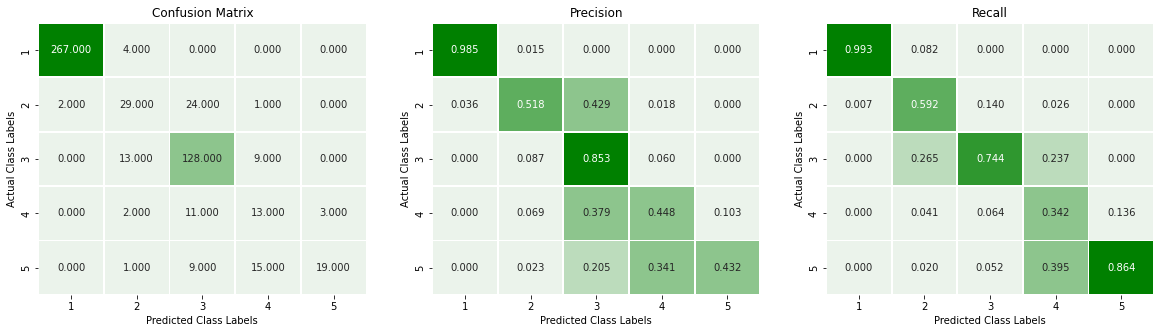

In [ ]:
metric = PerformanceMetric(labels_validation, y_pred)
metric.plotting()

In [ ]:
!tensorboard dev upload --logdir '/content/drive/MyDrive/Work_Yashwardhan/tensorboard/vgg19' \
  --name "vgg19" \
  --description "Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/drive/MyDrive/Work_Yashwardhan/tensorboard/vgg19

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=6SZVUIAtorBsAAq7t5otw

Xception,EfficientB3,Resnet152 remaining

Xceptionnet

In [ ]:
global_average_pooling_layer = GAP2D()
dropout_layer = dropout()
dense_layer = dense()


In [ ]:
def xception():
    '''This function is used for building a model architecture of pretrained Xception on imagenet data set.'''
    xception_ = Xception(weights = 'imagenet',include_top = False, input_shape = (512,512,3) )
    x = global_average_pooling_layer(xception_.layers[-1].output)
    x = dropout_layer(x)
    output = dense_layer(x)
    model = Model(xception_.layers[0].input,output)
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.00005), metrics=['accuracy'])
    return model

In [ ]:
xception_ = xception()
xception_.summary()


83683744/83683744 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 255, 255, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 255, 255, 32  128        ['block1_conv1[0][0]']           
 ation)                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                  'batch_normalization_2[0][0]']  
                                                                                                  
 block5_sepconv1_act (Activatio  (None, 32, 32, 728)  0          ['add_2[0][0]']                  
 n)                                                                                               
                                                                                                  
 block5_sepconv1 (SeparableConv  (None, 32, 32, 728)  536536     ['block5_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block5_sepconv1_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block5_sepconv1[0][0]']        
 lization)                                                                                        
          

In [ ]:
tensorboard = TensorBoard(log_dir = f'{tensorboard_path}xception')
validation_data = (x_validation, labels_validation)
kappa_metrics = Metrics(f'{diabetic_models_path}xception.h5',validation_data)
data_generator = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=180,zoom_range = 0.2)
xception_ = xception()
history = xception_.fit_generator(
                   data_generator.flow(x_train, labels_train, batch_size = 8),
                    steps_per_epoch=len(x_train) / 8,
                    epochs=30,
                    initial_epoch=0,
                    verbose=1,
                    validation_data=(x_validation, labels_validation),
                    validation_steps=len(x_validation) / 8,
                    callbacks=[kappa_metrics,tensorboard], class_weight = class_weight_dict)

<ipython-input-19-922de64c0adf>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = xception_.fit_generator(


Epoch 1/30
  6/389 [..............................] - ETA: 5:03 - loss: 0.2863 - accuracy: 0.0208

18/18 [==============================] - 17s 716ms/step
 - val_kappa:  0.8535

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/xception.h5...
389/389 [==============================] - 386s 937ms/step - loss: 0.1084 - accuracy: 0.8111 - val_loss: 0.1372 - val_accuracy: 0.8418
Epoch 2/30
18/18 [==============================] - 13s 758ms/step
 - val_kappa:  0.8939

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/xception.h5...
389/389 [==============================] - 371s 954ms/step - loss: 0.0643 - accuracy: 0.8319 - val_loss: 0.1180 - val_accuracy: 0.7782
Epoch 3/30
18/18 [==============================] - 13s 762ms/step
 - val_kappa:  0.9141

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/xception.h5...
389/389 [==============================] - 371s 953ms/step - loss: 0.0550 - accuracy: 0.8454 - val_loss: 0.1062 - val_accuracy: 0.7545


In [ ]:
xception_ = xception()
xception_.load_weights("/content/drive/MyDrive/Work_Yashwardhan/models/xception.h5")
result1 = xception_.evaluate(x_validation,labels_validation, verbose = 2)
y_pred = xception_.predict(x_validation, batch_size = 8)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


18/18 - 14s - loss: 0.1159 - accuracy: 1.0000 - 14s/epoch - 768ms/step
69/69 [==============================] - 13s 184ms/step


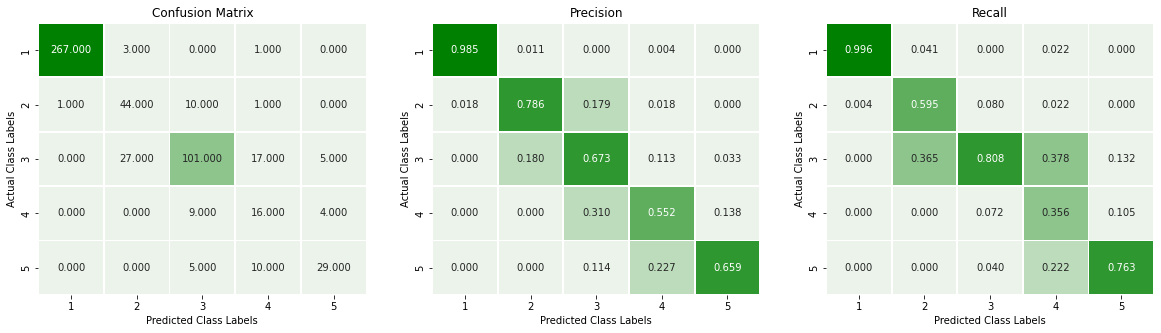

In [ ]:
metric = PerformanceMetric(labels_validation, y_pred)
metric.plotting()

efficientb3

In [ ]:
global_average_pooling_layer = GAP2D()
dropout_layer = dropout()
dense_layer = dense()
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, EfficientNetB4


In [ ]:
def efficientnet_b3():
    '''This function is used for building a model architecture of pretrained EfficientB3 on imagenet data set.'''
    efficientnet_ = EfficientNetB3(weights = 'imagenet',include_top = False, input_shape = (512,512,3) )
    x = global_average_pooling_layer(efficientnet_.layers[-1].output)
    x = dropout_layer(x)
    output = dense_layer(x)
    model = Model(efficientnet_.layers[0].input,output)
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.00005), metrics=['accuracy'])
    return model

In [ ]:
efficientnet_ = efficientnet_b3()
efficientnet_.summary()

43941136/43941136 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 512, 512, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 512, 512, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                             

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 block2a_se_reduce (Conv2D)     (None, 1, 1, 6)      870         ['block2a_se_reshape[0][0]']     
                                                                                                  
 block2a_se_expand (Conv2D)     (None, 1, 1, 144)    1008        ['block2a_se_reduce[0][0]']      
                                                                                                  
 block2a_se_excite (Multiply)   (None, 128, 128, 14  0           ['block2a_activation[0][0]',     
                                4)                                'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, 128, 128, 32  4608        ['block2a_se_excite[0][0]']      
                                )                                                                 
                                                                                                  
 block2a_p

In [ ]:
tensorboard = TensorBoard(log_dir = f'{tensorboard_path}efficientnet')
validation_data = (x_validation, labels_validation)
kappa_metrics = Metrics(f'{diabetic_models_path}efficientnet.h5',validation_data)
data_generator = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=180,zoom_range = 0.2)
efficientnet_ = efficientnet_b3()
history = efficientnet_.fit_generator(
                   data_generator.flow(x_train, labels_train, batch_size = 8),
                    steps_per_epoch=len(x_train) / 8,
                    epochs=30,
                    initial_epoch=0,
                    verbose=1,
                    validation_data=(x_validation, labels_validation),
                    validation_steps=len(x_validation) / 8,
                    callbacks=[kappa_metrics,tensorboard], class_weight = class_weight_dict)


<ipython-input-32-d7e32451593e>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = efficientnet_.fit_generator(


Epoch 1/30
  6/389 [..............................] - ETA: 4:48 - loss: 0.2843 - accuracy: 0.2083

18/18 [==============================] - 13s 495ms/step
 - val_kappa:  0.8893

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/efficientnet.h5...
389/389 [==============================] - 362s 859ms/step - loss: 0.1045 - accuracy: 0.7934 - val_loss: 0.1341 - val_accuracy: 0.7164
Epoch 2/30
18/18 [==============================] - 9s 526ms/step
 - val_kappa:  0.9035

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/efficientnet.h5...
389/389 [==============================] - 329s 845ms/step - loss: 0.0619 - accuracy: 0.7825 - val_loss: 0.1112 - val_accuracy: 0.7127
Epoch 3/30
18/18 [==============================] - 9s 525ms/step
 - val_kappa:  0.9128

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/efficientnet.h5...
389/389 [==============================] - 329s 844ms/step - loss: 0.0555 - accuracy: 0.8133 - val_loss: 0.1039 - val_accurac

In [ ]:
efficientnet_ = efficientnet_b3()
efficientnet_.load_weights("/content/drive/MyDrive/Work_Yashwardhan/models/efficientnet.h5")
result1 = efficientnet_.evaluate(x_validation,labels_validation, verbose = 2)
y_pred = efficientnet_.predict(x_validation, batch_size = 8)

18/18 - 12s - loss: 0.1270 - accuracy: 0.9418 - 12s/epoch - 693ms/step
69/69 [==============================] - 11s 135ms/step


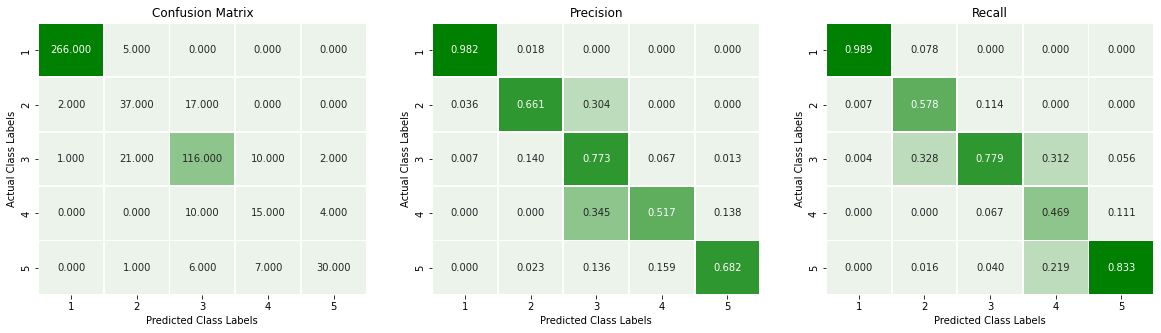

In [ ]:
metric = PerformanceMetric(labels_validation, y_pred)
metric.plotting()

resnet

In [ ]:
global_average_pooling_layer = GAP2D()
dropout_layer = dropout()
dense_layer = dense()
def ResNet152_():
    '''This function is used for building a model architecture of pretrained Resnet152 on imagenet data set.'''
    resnet = ResNet152(weights='imagenet',include_top=False,layers=keras.layers,input_shape=(512,512,3))
    x = global_average_pooling_layer(resnet.layers[-1].output)
    x = dropout_layer(x)
    output = dense_layer(x)
    model = Model(resnet.layers[0].input,output)
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.00005), metrics=['accuracy'])
    return model

In [ ]:
resnet = ResNet152_()
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 conv2_block3_out (Activation)  (None, 128, 128, 25  0           ['conv2_block3_add[0][0]']       
                                6)                                                                
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, 64, 64, 128)  32896       ['conv2_block3_out[0][0]']       
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, 64, 64, 128)  512        ['conv3_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, 64, 64, 128)  0          ['conv3_block1_1_bn[0][0]']      
 n)       

In [ ]:
tensorboard = TensorBoard(log_dir = f'{tensorboard_path}resnet')
validation_data = (x_validation, labels_validation)
kappa_metrics = Metrics(f'{diabetic_models_path}resnet.h5',validation_data)
data_generator = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=180,zoom_range = 0.2)
resnet = ResNet152_()
history = resnet.fit_generator(
                   data_generator.flow(x_train, labels_train, batch_size = 8),
                    steps_per_epoch=len(x_train) / 8,
                    epochs=30,
                    initial_epoch=0,
                    verbose=1,
                    validation_data=(x_validation, labels_validation),
                    validation_steps=len(x_validation) / 8,
                    callbacks=[kappa_metrics,tensorboard], class_weight = class_weight_dict)

<ipython-input-16-731da7171f4a>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet.fit_generator(


Epoch 1/30
18/18 [==============================] - 23s 1s/step
 - val_kappa:  0.8451

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/resnet.h5...
389/389 [==============================] - 485s 1s/step - loss: 0.0863 - accuracy: 0.7895 - val_loss: 0.1393 - val_accuracy: 0.7309
Epoch 2/30
18/18 [==============================] - 18s 1s/step
 - val_kappa:  0.8998

		Validation Kappa has improved. Saving model to /content/drive/MyDrive/Work_Yashwardhan/models/resnet.h5...
389/389 [==============================] - 452s 1s/step - loss: 0.0596 - accuracy: 0.7561 - val_loss: 0.1223 - val_accuracy: 0.7582
Epoch 3/30
18/18 [==============================] - 18s 1s/step
 - val_kappa:  0.8827

		Validation kappa did not improved from 0.8997807551766139
389/389 [==============================] - 443s 1s/step - loss: 0.0585 - accuracy: 0.7760 - val_loss: 0.1534 - val_accuracy: 0.7491
Epoch 4/30
18/18 [==============================] - 18s 1s/ste

ResourceExhaustedError: ignored

In [ ]:
resnet = ResNet152_()
resnet.load_weights("/content/drive/MyDrive/Work_Yashwardhan/models/resnet152.h5")
result = resnet.evaluate(x_validation,labels_validation)
y_pred = resnet.predict(x_validation)

In [ ]:
metric = PerformanceMetric(labels_validation, y_pred)
metric.plotting()

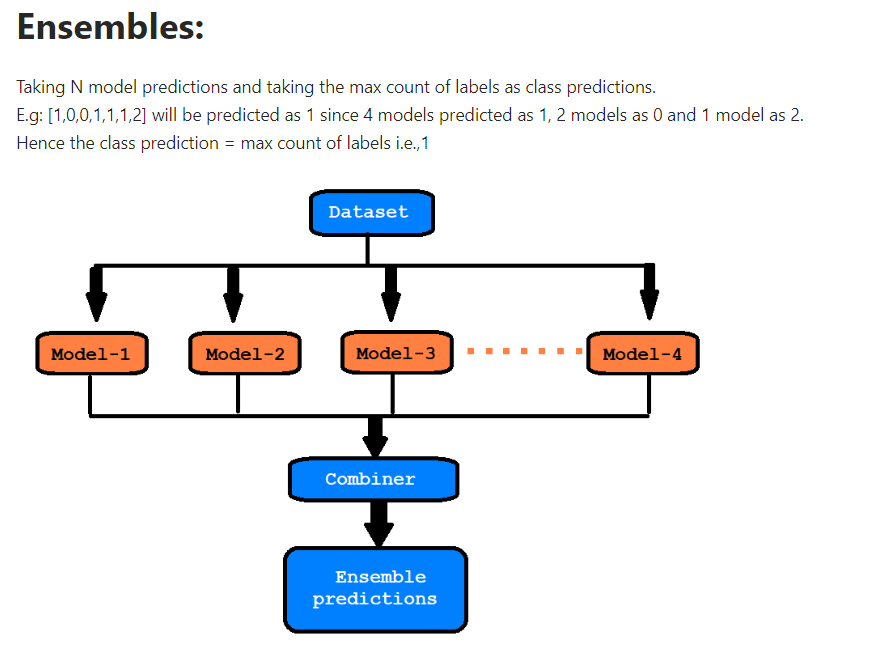

In [ ]:
def ensembling(df):

    predictions=[]
    for i in range(df.shape[0]):
        row = list(df.iloc[i][2:12])  # ignoring baseline and alexnet predictions
        max=-1; max_label=-1
        for j in set(row):
            count = row.count(j)
            if count>max: max=count; max_label=j   # checking the best agreement label from all models
        predictions.append(max_label)
    return predictions

In [ ]:
train_preds = ensembling(train_predictions)
val_preds = ensembling(validation_predictions)
test_preds = ensembling(test_predictions)
metric = PerformanceMetric(validation_predictions['label'], val_preds)
metric.plotting()

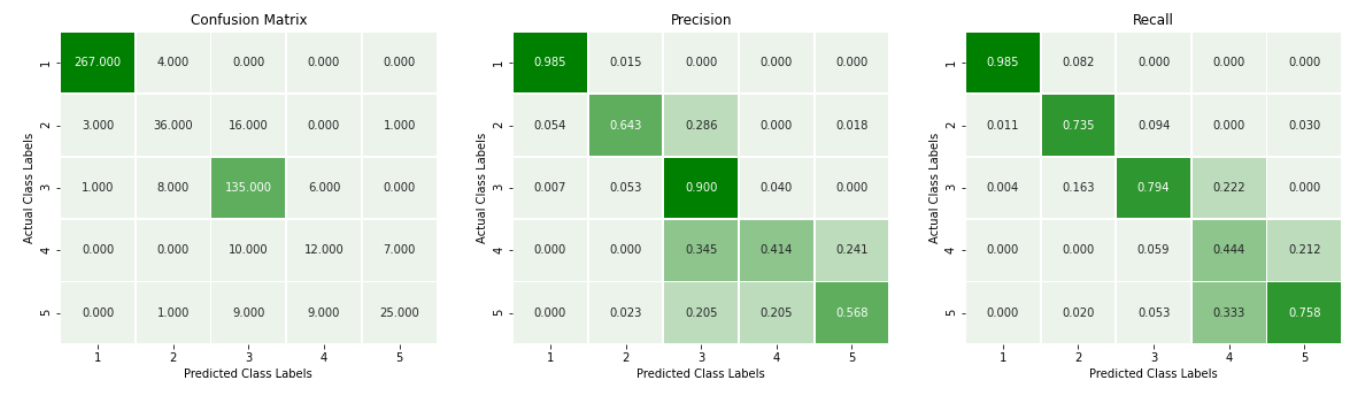

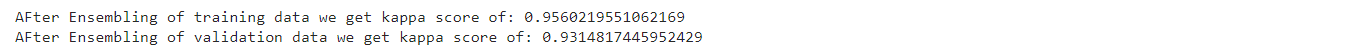